In [1]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import seaborn as sns
from PIL import Image

# Data preprocessing 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Data modelling & modeling preprocessing
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionV3

# Model evaluation 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# For reproducibility
np.random.seed(42)

# 2.0 Exploratory Data Analysis (EDA) 

In [2]:
# Loading dataset 
train_data = 'final_clean_data/train' 
test_data = 'final_clean_data/test' 
valid_data = 'final_clean_data/valid' 

## 2.1 Identify the number of classes in the dataset

In [4]:
# Hold the names of subdirectories
subdirectories = []

# Get a list of all entries in the directory 'train_data'
directory_entries = os.scandir(train_data)

for entry in directory_entries:
    if entry.is_dir():
        directory_name = entry.name
        subdirectories.append(directory_name)
        
for subdir in subdirectories:
    print(f'==> Vegetable names | freshness level :{subdir}')
    
print(f"\n ==> Total number of classes: {len(subdirectories)}")

==> Vegetable names | freshness level :cabbage_fresh
==> Vegetable names | freshness level :cabbage_slightly_unfresh
==> Vegetable names | freshness level :cabbage_unfresh
==> Vegetable names | freshness level :cauliflower_fresh
==> Vegetable names | freshness level :cauliflower_slightly_unfresh
==> Vegetable names | freshness level :cauliflower_unfresh
==> Vegetable names | freshness level :cherry_tomatoes_fresh
==> Vegetable names | freshness level :cherry_tomatoes_slightly_unfresh
==> Vegetable names | freshness level :cherry_tomatoes_unfresh
==> Vegetable names | freshness level :green_chili_fresh
==> Vegetable names | freshness level :green_chili_unfresh
==> Vegetable names | freshness level :red_chili_fresh
==> Vegetable names | freshness level :red_chili_slightly_unfresh
==> Vegetable names | freshness level :red_chili_unfresh
==> Vegetable names | freshness level :tomatoes_fresh
==> Vegetable names | freshness level :tomatoes_slightly_unfresh
==> Vegetable names | freshness lev

## 2.2 Examine Cabbage dataset 

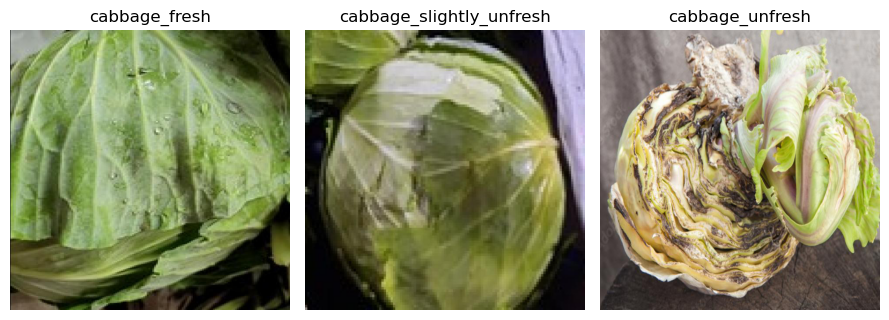

In [31]:
subdirectories = ['cabbage_fresh', 'cabbage_slightly_unfresh', 'cabbage_unfresh']

fig, axes = plt.subplots(1, 3, figsize=(9,9))
axes = axes.flatten()

for idx,subdir in enumerate(subdirectories):
    subdir_path = os.path.join(train_data, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith('jpg')]
    
    
    if image_files: 
        image_path = os.path.join(train_data, subdir, image_files[0])
        img =mpimg.imread(image_path)
        
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{subdir}")

plt.tight_layout()       
plt.show()    

##### Fresh Cabbage
For fresh cabbage, we typically look for a vibrant and consistent color. Green cabbages, for instance, should appear bright and deep green. The leaves of fresh cabbage should look tight and crisp.

##### Slightly Unfresh Cabbage
Slightly unfresh cabbage may appear duller or have yellowing leaves. The texture of the leaves can appear wilting and loosening. The surface of the cabbage may have some blemishes or spots.

##### Unfresh Cabbage
Unfresh cabbage often shows significant discoloration or has many brown or black spots. The texture of the leaves may look very loose, wilted, or even slimy. The surface may appear rotten or moldy.

## 2.3 Examine Cauliflower dataset 

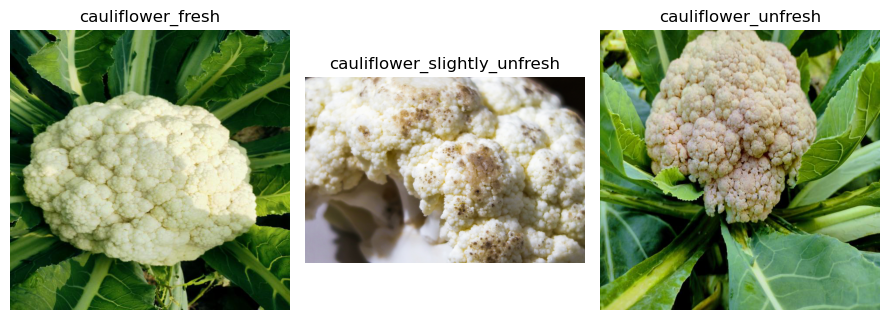

In [32]:
subdirectories = ['cauliflower_fresh', 'cauliflower_slightly_unfresh', 'cauliflower_unfresh']

fig, axes = plt.subplots(1, 3, figsize=(9,9))
axes = axes.flatten()

for idx,subdir in enumerate(subdirectories):
    subdir_path = os.path.join(train_data, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith('jpg')]
    
    
    if image_files: 
        image_path = os.path.join(train_data, subdir, image_files[0])
        img =mpimg.imread(image_path)
        
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{subdir}")

plt.tight_layout()       
plt.show()  

##### Fresh Cauliflower
Fresh cauliflower is characterized by its firm, tightly packed florets and a uniformly white or creamy color. The florets should be compact and free of any brown or dark spots. Fresh cauliflower also has vibrant green leaves that are crisp and not wilted. The overall appearance should be clean and fresh, with no signs of softness or sogginess.

##### Slightly Unfresh Cauliflower
Slightly unfresh cauliflower the florets might start showing slight discolorations or small brown spots. The cauliflower may have a less vibrant appearance, with the once tightly packed florets beginning to spread or loosen slightly. The leaves may also start to wilt or yellow, and the overall freshness appears diminished.

##### Unfresh Cauliflower
Unfresh cauliflower is easily identifiable by its noticeably discolored, brown, or black spots on the florets. The texture is often soft and soggy, with the florets becoming loose or falling apart.

## 2.4 Examine Cherry Tomatoes dataset 

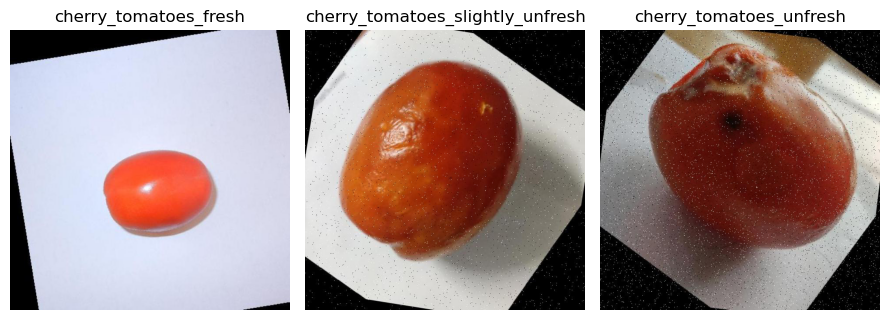

In [33]:
subdirectories = ['cherry_tomatoes_fresh', 'cherry_tomatoes_slightly_unfresh', 'cherry_tomatoes_unfresh']

fig, axes = plt.subplots(1, 3, figsize=(9,9))
axes = axes.flatten()

for idx,subdir in enumerate(subdirectories):
    subdir_path = os.path.join(train_data, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith('jpg')]
    
    
    if image_files: 
        image_path = os.path.join(train_data, subdir, image_files[0])
        img =mpimg.imread(image_path)
        
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{subdir}")

plt.tight_layout()       
plt.show() 

##### Fresh Cherry Tomatoes
Fresh cherry tomatoes are known for their bright, vibrant color, which can range from a deep red to a rich orange, depending on the variety. They have a smooth and glossy skin. There should be no signs of wrinkling, bruising, or soft spots on the skin.

##### Slightly Unfresh Cherry Tomatoes
Slightly unfresh cherry tomatoes may start to lose their vibrant color, appearing duller. The skin may begin to show slight wrinkling or shriveling, indicating a loss of moisture. They might have minor blemishes or soft spots.

##### Unfresh Cherry Tomatoes
Unfresh cherry tomatoes exhibit significant signs of deterioration. The skin may be deeply wrinkled, discolored, or have multiple soft, bruised spots.

## 2.5 Examine Red Chili dataset 

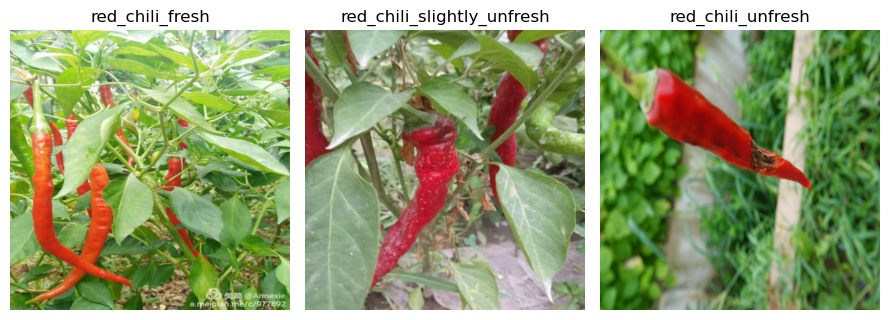

In [34]:
subdirectories = ['red_chili_fresh', 'red_chili_slightly_unfresh', 'red_chili_unfresh']

fig, axes = plt.subplots(1, 3, figsize=(9,9))
axes = axes.flatten()

for idx,subdir in enumerate(subdirectories):
    subdir_path = os.path.join(train_data, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith('jpg')]
    
    
    if image_files: 
        image_path = os.path.join(train_data, subdir, image_files[0])
        img =mpimg.imread(image_path)
        
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{subdir}")

plt.tight_layout()       
plt.show() 

##### Fresh Red Chili
Fresh red chilies are characterized by their bright, vivid red color. They have a smooth, glossy, and taut skin with a firm texture.The stem of a fresh red chili is typically green and sturdy. There should be no signs of wrinkles, soft spots, or blemishes on the skin.

##### Slightly Unfresh Red Chili
Slightly unfresh red chilies may start to lose their bright color, appearing a bit duller. The skin might begin to show minor wrinkles or slight discoloration. The stem could start to look a bit dry or brown.

##### Unfresh Red Chili
Unfresh red chilies exhibit significant signs of aging or spoilage. The skin may be heavily wrinkled, discolored, or have dark spots. The stem is typically dry, shriveled, or missing.

## 2.6 Examine Tomatoes dataset 

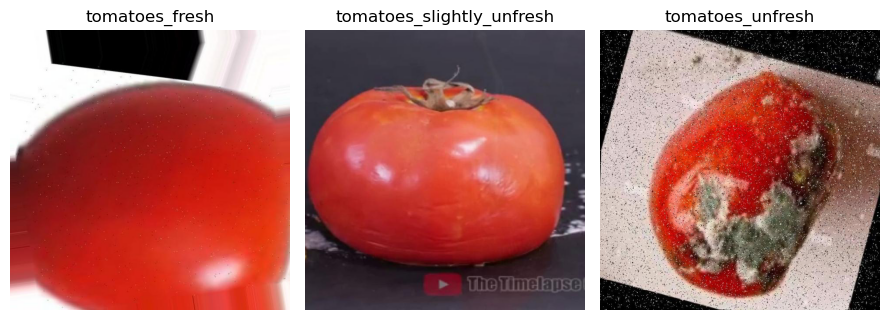

In [35]:
subdirectories = ['tomatoes_fresh', 'tomatoes_slightly_unfresh', 'tomatoes_unfresh']

fig, axes = plt.subplots(1, 3, figsize=(9,9))
axes = axes.flatten()

for idx,subdir in enumerate(subdirectories):
    subdir_path = os.path.join(train_data, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith('jpg')]
    
    
    if image_files: 
        image_path = os.path.join(train_data, subdir, image_files[0])
        img =mpimg.imread(image_path)
        
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{subdir}")

plt.tight_layout()       
plt.show() 

##### Fresh Tomatoes
Fresh tomatoes are characterized by their vibrant, even coloring, which can range from bright red to deep reddish-orange, depending on the variety. They have a firm yet slightly yielding texture when gently squeezed. The skin should be smooth, glossy, and free of blemishes, cracks, or bruises. 

##### Slightly Unfresh Tomatoes
Slightly unfresh tomatoes may begin to lose their bright color, appearing somewhat dull. The skin may start showing signs of wrinkling or slight softening. They might develop small blemishes or soft spots.

##### Unfresh Tomatoes
Unfresh tomatoes show clear signs of overripeness or spoilage. The skin may be deeply wrinkled, discolored, or have multiple soft and bruised spots. These tomatoes are often mushy and yield easily to pressure, indicating a breakdown of the internal structure.

## 2.7 Examine Green Chili dataset 

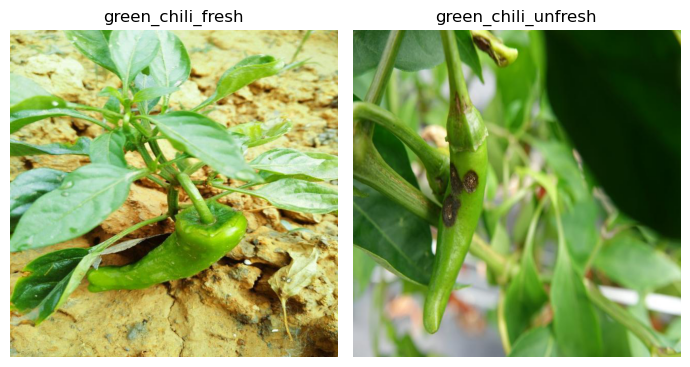

In [41]:
subdirectories = ['green_chili_fresh',  'green_chili_unfresh']

fig, axes = plt.subplots(1, 2, figsize=(7,7))
axes = axes.flatten()

for idx,subdir in enumerate(subdirectories):
    subdir_path = os.path.join(train_data, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith('jpg')]
    
    
    if image_files: 
        image_path = os.path.join(train_data, subdir, image_files[0])
        img =mpimg.imread(image_path)
        
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f"{subdir}")

plt.tight_layout()       
plt.show() 

##### Fresh Green Chili
Fresh green chilies exhibit a vibrant green color, indicative of their freshness and quality. The skin should be smooth, glossy, and taut, without any wrinkles or blemishes. The stem of a fresh green chili is typically bright green and robust. 


##### Unfresh Green Chili
Unfresh green chilies often show significant signs of aging or spoilage. The green color may fade considerably, with pronounced yellowing or brown discoloration. The skin may be heavily wrinkled or have dark spots, and the chili often feels soft or mushy to the touch.

## 2.8 Checking the distribution of the train dataset

In [5]:
# Plot the distribution of each class 
def plot_class_distribution(data):
    subdirectories = [d.name for d in os.scandir(data) if d.is_dir()]
    
    #count the total number pf image for each class 
    counts = {}
    
    for subdir in subdirectories:
        full_path = os.path.join(data,subdir)
        directory_items = os.listdir(full_path)
        item_count = len(directory_items)
        counts[subdir] = item_count
        
    #Sort the classes and their count for consistent plotting
    sorted_subdirs = sorted(counts.keys())
    sorted_counts = [counts[subdir] for subdir in sorted_subdirs]
    
    plt.figure(figsize=(10,8))
    plt.bar(sorted_subdirs, sorted_counts)
    plt.xlabel("Classes")
    plt.ylabel("Number of pictures")
    plt.xticks(rotation=90)
    plt.title('Number of pictures per class')
    plt.show()

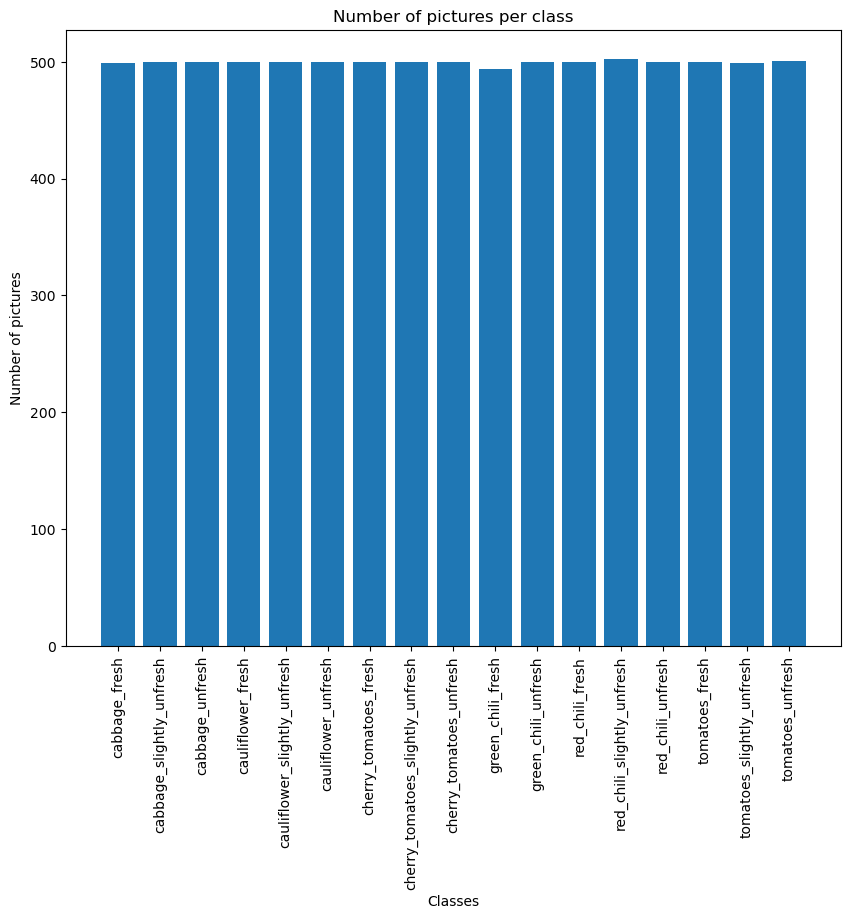

In [6]:
plot_class_distribution(train_data)

From the chart above, it shows that all the six types of ingredients and each classes of freshness levels have the same amount of data.

# 3.0 Data Preprocessing 

In [49]:
# Checking the classes label
class_labels = [d for d in os.listdir(train_data) if os.path.isdir(os.path.join(train_data,d))]
class_labels.sort()

print(class_labels)

['cabbage_fresh', 'cabbage_slightly_unfresh', 'cabbage_unfresh', 'cauliflower_fresh', 'cauliflower_slightly_unfresh', 'cauliflower_unfresh', 'cherry_tomatoes_fresh', 'cherry_tomatoes_slightly_unfresh', 'cherry_tomatoes_unfresh', 'green_chili_fresh', 'green_chili_unfresh', 'red_chili_fresh', 'red_chili_slightly_unfresh', 'red_chili_unfresh', 'tomatoes_fresh', 'tomatoes_slightly_unfresh', 'tomatoes_unfresh']


In [8]:
# Data loading and preprocesing
train_generator = tf.keras.utils.image_dataset_from_directory(
    directory=train_data,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.25,
    subset='training'
)


# Data loading and preprocessing for validation
val_generator = tf.keras.utils.image_dataset_from_directory(
    directory=train_data,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.25,
    subset='validation'
)

Found 8495 files belonging to 17 classes.
Using 6372 files for training.
Found 8495 files belonging to 17 classes.
Using 2123 files for validation.


##### Training Data Loader (train_generator) 
This loads images from a specified directory, automatically infers labels from the folder structure, resizes images to 224x224 pixels, converts them to categorical format, shuffles the order (with a set seed for reproducibility), and splits the data, reserving 75% for training. It processes the images in batches of 32.

##### Validation Data Loader (val_generator)
This performs the same actions as the training data loader but is specifically for the remaining 25% of the data, designated as the validation set.

These datasets are essential for training and validating a deep learning model, ensuring that it learns from a varied dataset and its performance is evaluated on separate, unseen data.

# 4.0 Building Models 

## 4.1.0 Building model using EfficientNetB3

In [9]:
# Apply preprocess_input to the datasets
train_generator = train_generator.map(lambda x, y: (preprocess_input(x), y))
val_generator = val_generator.map(lambda x, y: (preprocess_input(x), y))

In [10]:
%%time
# Using pre-trained  model
base_model = tf.keras.applications.EfficientNetB3(include_top=False,
                                                  weights='imagenet',
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg')  # Optional pooling

# Create a new model on top of pre trained model 
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')  # 17 classes for your task
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
200/200 [==============================] - 829s 4s/step - loss: 0.5780 - accuracy: 0.8297 - val_loss: 0.2832 - val_accuracy: 0.9213
Epoch 2/10
200/200 [==============================] - 828s 4s/step - loss: 0.2288 - accuracy: 0.9298 - val_loss: 0.2732 - val_accuracy: 0.9256
Epoch 3/10
200/200 [==============================] - 830s 4s/step - loss: 0.1530 - accuracy: 0.9518 - val_loss: 1.8547 - val_accuracy: 0.7522
Epoch 4/10
200/200 [==============================] - 833s 4s/step - loss: 0.1824 - accuracy: 0.9446 - val_loss: 0.4256 - val_accuracy: 0.8992
Epoch 5/10
200/200 [==============================] - 840s 4s/step - loss: 0.1637 - accuracy: 0.9482 - val_loss: 0.2431 - val_accuracy: 0.9374
Epoch 6/10
200/200 [==============================] - 837s 4s/step - loss: 0.1228 - accuracy: 0.9626 - val_loss: 0.1166 - val_accuracy: 0.9642
Epoch 7/10
200/200 [==============================] - 841s 4s/step - loss: 0.1315 - accuracy: 0.9620 - val_loss: 0.2105 - val_accuracy: 0.9336

### 4.1.1 Plotting out the Accuracy and Loss Chart 

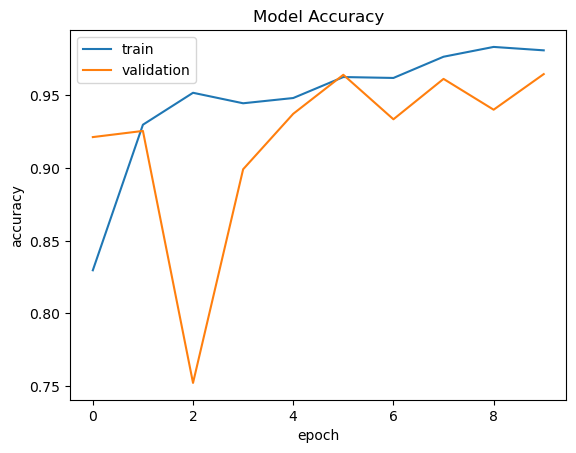

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

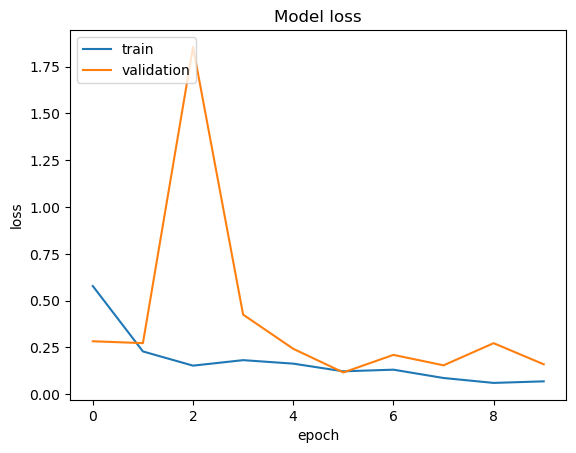

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
# saving the model
model.save('model_folder/Freshness_classification/efficientnetb3')

INFO:tensorflow:Assets written to: model_folder/Freshness_classification/efficientnetb3\assets


INFO:tensorflow:Assets written to: model_folder/Freshness_classification/efficientnetb3\assets


## 4.2.0 Building model using EfficientNetB7

In [21]:
%%time
# Using pre-trained  model
base_model = tf.keras.applications.EfficientNetB7(include_top=False,
                                                  weights='imagenet',
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg')  # Optional pooling

# Create a new model on top of pre trained model 
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')  # 12 classes for your task
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_b7 = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
200/200 [==============================] - 5356s 27s/step - loss: 0.6021 - accuracy: 0.8192 - val_loss: 0.8887 - val_accuracy: 0.7786
Epoch 2/10
200/200 [==============================] - 5232s 26s/step - loss: 0.2762 - accuracy: 0.9170 - val_loss: 0.3116 - val_accuracy: 0.9086
Epoch 3/10
200/200 [==============================] - 5247s 26s/step - loss: 0.2567 - accuracy: 0.9250 - val_loss: 0.2062 - val_accuracy: 0.9439
Epoch 4/10
200/200 [==============================] - 5234s 26s/step - loss: 0.1983 - accuracy: 0.9382 - val_loss: 0.2936 - val_accuracy: 0.9110
Epoch 5/10
200/200 [==============================] - 5303s 27s/step - loss: 0.1278 - accuracy: 0.9606 - val_loss: 0.2637 - val_accuracy: 0.9298
Epoch 6/10
200/200 [==============================] - 5228s 26s/step - loss: 0.0785 - accuracy: 0.9785 - val_loss: 0.1208 - val_accuracy: 0.9666
Epoch 7/10
200/200 [==============================] - 5225s 26s/step - loss: 0.1238 - accuracy: 0.9625 - val_loss: 0.2922 - val_ac

### 4.2.1 Plotting out the Accuracy and Loss chart 

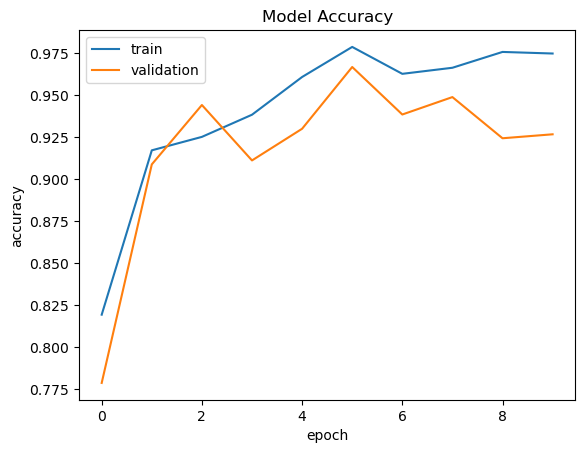

In [22]:
plt.plot(history_b7.history['accuracy'])
plt.plot(history_b7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

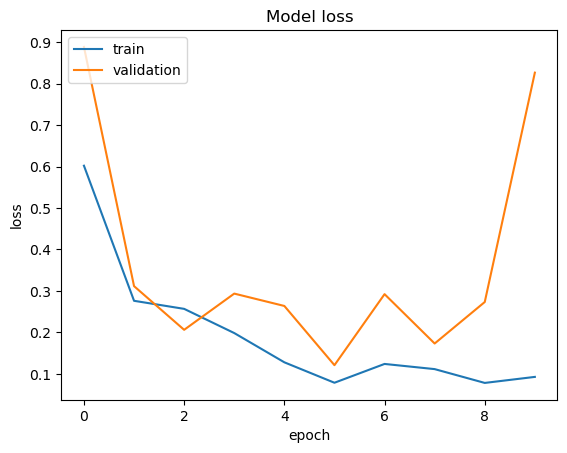

In [23]:
plt.plot(history_b7.history['loss'])
plt.plot(history_b7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
# saving the model
model.save('model_folder/Freshness_classification/efficientnetb7')

INFO:tensorflow:Assets written to: model_folder/Freshness_classification/efficientnetb7\assets


INFO:tensorflow:Assets written to: model_folder/Freshness_classification/efficientnetb7\assets


## 4.3.0 Building model using MobileNetV2 

In [15]:
%%time

# Load MobileNetV2 without the top layer
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3), alpha=1.0, pooling='avg')

# Create a new model on top of pre trained model 
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')  # 17 classes for your task
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_mobilenetv2 = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
200/200 [==============================] - 301s 1s/step - loss: 0.6818 - accuracy: 0.7842 - val_loss: 15.4821 - val_accuracy: 0.1060
Epoch 2/10
200/200 [==============================] - 286s 1s/step - loss: 0.3714 - accuracy: 0.8845 - val_loss: 21.9085 - val_accuracy: 0.1116
Epoch 3/10
200/200 [==============================] - 300s 2s/step - loss: 0.2906 - accuracy: 0.9082 - val_loss: 22.3115 - val_accuracy: 0.0754
Epoch 4/10
200/200 [==============================] - 299s 1s/step - loss: 0.2038 - accuracy: 0.9360 - val_loss: 22.3342 - val_accuracy: 0.0857
Epoch 5/10
200/200 [==============================] - 303s 2s/step - loss: 0.2260 - accuracy: 0.9261 - val_loss: 10.0402 - val_accuracy: 0.2986
Epoch 6/10
200/200 [==============================] - 296s 1s/step - loss: 0.1450 - accuracy: 0.9515 - val_loss: 13.3588 - val_accuracy: 0.1992
Epoch 7/10
200/200 [==============================] - 295s 1s/step - loss: 0.1666 - accuracy: 0.9485 - val_loss: 11.5488 - val_accuracy:

### 4.3.1 Plotting out the Accuracy and Loss chart 

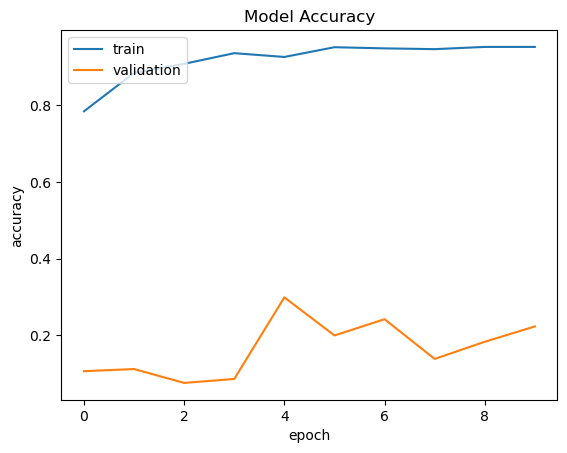

In [16]:
plt.plot(history_mobilenetv2.history['accuracy'])
plt.plot(history_mobilenetv2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

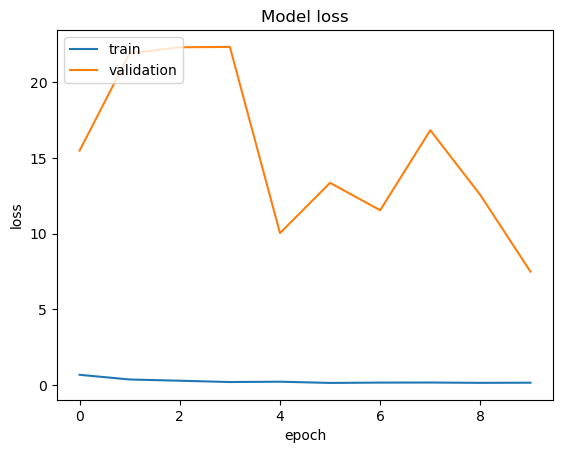

In [17]:
plt.plot(history_mobilenetv2.history['loss'])
plt.plot(history_mobilenetv2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
# saving the model
model.save('model_folder/Freshness_classification/history_mobilenetv2')

INFO:tensorflow:Assets written to: model_folder/Freshness_classification/history_mobilenetv2\assets


INFO:tensorflow:Assets written to: model_folder/Freshness_classification/history_mobilenetv2\assets


## 4.4.0 Building model using InceptionV3

In [10]:
%%time 
# Load InceptionV3 as the base model
base_model = InceptionV3(include_top=False, weights='imagenet', 
                         input_shape=(224, 224, 3), pooling='avg')

# Create a new model on top
model = tf.keras.Sequential([
    base_model,
    Dense(1024, activation='relu'),
    Dense(17, activation='softmax')  # 17 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_v3 = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
200/200 [==============================] - 525s 3s/step - loss: 0.9514 - accuracy: 0.6973 - val_loss: 2.6341 - val_accuracy: 0.3448
Epoch 2/10
200/200 [==============================] - 493s 2s/step - loss: 0.4883 - accuracy: 0.8354 - val_loss: 1.6400 - val_accuracy: 0.5822
Epoch 3/10
200/200 [==============================] - 534s 3s/step - loss: 0.3435 - accuracy: 0.8834 - val_loss: 0.6313 - val_accuracy: 0.8092
Epoch 4/10
200/200 [==============================] - 542s 3s/step - loss: 0.2970 - accuracy: 0.9032 - val_loss: 1.7518 - val_accuracy: 0.6519
Epoch 5/10
200/200 [==============================] - 538s 3s/step - loss: 0.2943 - accuracy: 0.8999 - val_loss: 0.5190 - val_accuracy: 0.8370
Epoch 6/10
200/200 [==============================] - 540s 3s/step - loss: 0.1905 - accuracy: 0.9366 - val_loss: 0.3109 - val_accuracy: 0.9049
Epoch 7/10
200/200 [==============================] - 563s 3s/step - loss: 0.1812 - accuracy: 0.9419 - val_loss: 0.9068 - val_accuracy: 0.8050

### 4.4.1 Plotting out the Accuracy and Loss chart 

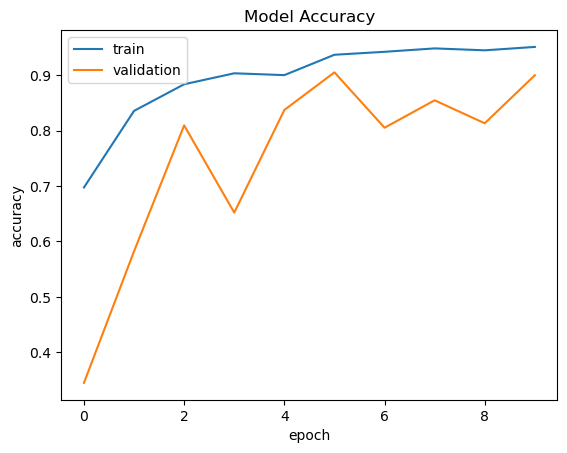

In [11]:
plt.plot(history_v3.history['accuracy'])
plt.plot(history_v3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

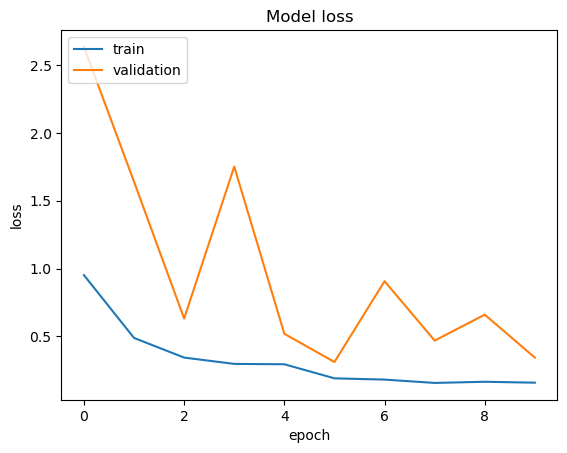

In [12]:
plt.plot(history_v3.history['loss'])
plt.plot(history_v3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
# saving the model
model.save('model_folder/Freshness_classification/InceptionV3_a')

INFO:tensorflow:Assets written to: model_folder/Freshness_classification/InceptionV3_a\assets


INFO:tensorflow:Assets written to: model_folder/Freshness_classification/InceptionV3_a\assets


# 5.0 Evaluting model performance


In [9]:
# preparing the test and validation set data 
test_data_generation = tf.keras.utils.image_dataset_from_directory(
    directory=test_data,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    seed=42
)


val_data_generation = tf.keras.utils.image_dataset_from_directory(
    directory=valid_data,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    seed=42
)


Found 844 files belonging to 17 classes.
Found 1006 files belonging to 17 classes.


## 5.1 Loading all trained model 

In [4]:
from tensorflow.keras.models import load_model

# Load the saved model
model_efficientnetb7 = load_model('model_folder/Freshness_classification/efficientnetb7')
model_efficientnetb3 = load_model('model_folder/Freshness_classification/efficientnetb3')
model_mobilenetv2 = load_model('model_folder/Freshness_classification/history_mobilenetv2')
model_inceptionv3 = load_model('model_folder/Freshness_classification/InceptionV3_a')


## 5.2 Evaluating EfficientnetB3 Model

In [10]:
# Apply preprocess_input to the datasets
test_data_generation = test_data_generation.map(lambda x, y: (preprocess_input(x), y))
val_data_generation = val_data_generation.map(lambda x, y: (preprocess_input(x), y))

In [19]:
%%time 
# Get the true label from the generator
true_labels = np.concatenate([y for x, y in val_data_generation], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Use the E-netB3 for predcition
predictions_enetb3 = model_efficientnetb3.predict(val_data_generation)

# Convert model prediction to label class
predicted_labels = np.argmax(predictions_enetb3, axis=1)

precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

loss, accuracy = model_efficientnetb3.evaluate(val_data_generation)

print('Test Loss:', round(loss,3))
print('Test Accuracy:', round(accuracy,3))
print('Test Precision:', round(precision, 3))
print('Test Recall:', round(recall, 3))
print('Test F1 Score:', round(f1, 3))

32/32 [==============================] - 26s 809ms/step - loss: 3.5670 - accuracy: 0.7127
Test Loss: 3.567
Test Accuracy: 0.713
Test Precision: 0.044
Test Recall: 0.051
Test F1 Score: 0.047
CPU times: total: 9min 6s
Wall time: 52.4 s


## 5.3 Evaluating EfficientnetB7 Model

In [20]:
%%time 
# Get the true label from the generator
true_labels = np.concatenate([y for x, y in val_data_generation], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Use the E-netB3 for predcition
predictions_enetb7 = model_efficientnetb7.predict(val_data_generation)

# Convert model prediction to label class
predicted_labels = np.argmax(predictions_enetb7, axis=1)

precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

loss, accuracy = model_efficientnetb7.evaluate(val_data_generation)

print('Test Loss:', round(loss,3))
print('Test Accuracy:', round(accuracy,3))
print('Test Precision:', round(precision, 3))
print('Test Recall:', round(recall, 3))
print('Test F1 Score:', round(f1, 3))

32/32 [==============================] - 86s 3s/step - loss: 4.0805 - accuracy: 0.6799
Test Loss: 4.081
Test Accuracy: 0.68
Test Precision: 0.049
Test Recall: 0.049
Test F1 Score: 0.048
CPU times: total: 29min 10s
Wall time: 2min 51s


## 5.4 Evaluating Mobilenetv2 Model

In [21]:
%%time 
# Get the true label from the generator
true_labels = np.concatenate([y for x, y in val_data_generation], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Use the E-netB3 for predcition
predictions_mnetv2 = model_mobilenetv2.predict(val_data_generation)

# Convert model prediction to label class
predicted_labels = np.argmax(predictions_mnetv2, axis=1)

precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

loss, accuracy = model_mobilenetv2.evaluate(val_data_generation)

print('Test Loss:', round(loss,3))
print('Test Accuracy:', round(accuracy,3))
print('Test Precision:', round(precision, 3))
print('Test Recall:', round(recall, 3))
print('Test F1 Score:', round(f1, 3))

32/32 [==============================] - 8s 237ms/step


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 8s 239ms/step - loss: 9.4841 - accuracy: 0.1093
Test Loss: 9.484
Test Accuracy: 0.109
Test Precision: 0.025
Test Recall: 0.059
Test F1 Score: 0.026
CPU times: total: 2min 33s
Wall time: 16.1 s


## 5.5 Evaluating InceptionV3 Model

In [22]:
%%time 
# Get the true label from the generator
true_labels = np.concatenate([y for x, y in val_data_generation], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Use the E-netB3 for predcition
predictions_iv3 = model_inceptionv3.predict(val_data_generation)

# Convert model prediction to label class
predicted_labels = np.argmax(predictions_iv3, axis=1)

precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

loss, accuracy = model_inceptionv3.evaluate(val_data_generation)

print('Test Loss:', round(loss,3))
print('Test Accuracy:', round(accuracy,3))
print('Test Precision:', round(precision, 3))
print('Test Recall:', round(recall, 3))
print('Test F1 Score:', round(f1, 3))

32/32 [==============================] - 22s 696ms/step - loss: 2.9953 - accuracy: 0.6511
Test Loss: 2.995
Test Accuracy: 0.651
Test Precision: 0.062
Test Recall: 0.065
Test F1 Score: 0.061
CPU times: total: 4min 11s
Wall time: 46.2 s


## 5.6 Model performance summary 

|**Model**|**Average val_accuracy**|**Training time**|**Test Accuracy**|**Testing Time**| 
|---|---|---|---|---|
|EfficientNetB3|0.9374|2hr 19min 6s|0.713|52.4s| 
|EfficientNetB7|0.9298|14hr 37min 18s|0.68|2min 51s| 
|MobileNetV2|0.1380|49min 29s|0.109|16.1s| 
|InceptionV3|0.8370|1h 30min 39s|0.651|46.2s|

## 5.7 Confusion Matrix for EfficientnetB3 

27/27 [==============================] - 22s 785ms/step


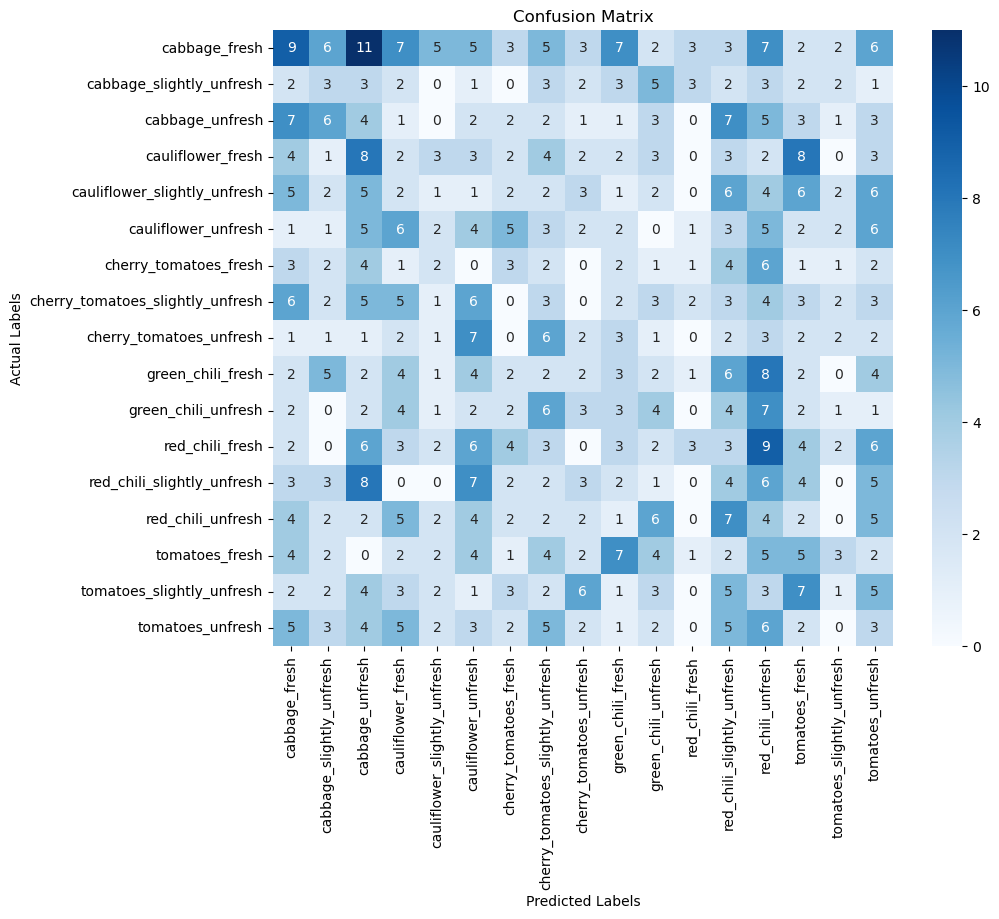

The class 'cabbage_fresh' was tested 86 times.
The class 'cabbage_slightly_unfresh' was tested 37 times.
The class 'cabbage_unfresh' was tested 48 times.
The class 'cauliflower_fresh' was tested 50 times.
The class 'cauliflower_slightly_unfresh' was tested 50 times.
The class 'cauliflower_unfresh' was tested 50 times.
The class 'cherry_tomatoes_fresh' was tested 35 times.
The class 'cherry_tomatoes_slightly_unfresh' was tested 50 times.
The class 'cherry_tomatoes_unfresh' was tested 36 times.
The class 'green_chili_fresh' was tested 50 times.
The class 'green_chili_unfresh' was tested 44 times.
The class 'red_chili_fresh' was tested 58 times.
The class 'red_chili_slightly_unfresh' was tested 50 times.
The class 'red_chili_unfresh' was tested 50 times.
The class 'tomatoes_fresh' was tested 50 times.
The class 'tomatoes_slightly_unfresh' was tested 50 times.
The class 'tomatoes_unfresh' was tested 50 times.


In [36]:
# Convert model prediction to label class
predictions_enetb3 = model_efficientnetb3.predict(test_data_generation)
predicted_labels = np.argmax(predictions_enetb3, axis=1)

# Get the true label from the generator
true_labels = np.concatenate([y for x, y in test_data_generation], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get the names of the classes
class_names = sorted(os.listdir(test_data))  

# Create a confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels to the plot
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Display the plot
plt.show()

# Calculate the number of instances for each actual class
class_counts = np.sum(cm, axis=1)

# Print the number of instances for each class
for class_name, count in zip(class_names, class_counts):
    print(f"The class '{class_name}' was tested {count} times.")

From this confusion matrix, we can tell that the model seem to have the tendency to misclassified the ingredients and the freshness level of the ingredients 